# Project Summary:
The entire project is consist of two parts:
- Part I is to find out what type of vehicles that makes less CO2 emissions from Canadian government open data.
- Part II is to provide the information of the brand and the category of bike to the team lead for sale purpose. 

# Part I

## Objective
Either you drive or take public transit, CO2 emissions will be produced by vehicles based on its energy source unless vehicles use pure clean energy without making CO2 emissions. We are going to explore the data provided by Canadian governement to find out the feature of vehicles that makes CO2 emissions.

## Data 

#### We will explore seven years of CO2 emissions data for Canadian vehicles ([source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6)) from the Government of Canada's open data [website](https://open.canada.ca/en) :

- "Make" - The company that manufactures the vehicle.
- "Model" - The vehicle's model.
- "Vehicle Class" - Vehicle class by utility, capacity, and weight.
- "Engine Size(L)" - The engine's displacement in liters.
- "Cylinders" - The number of cylinders.
- "Transmission" - The transmission type: A = Automatic, AM = Automatic Manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 - 10 = the number of gears.
- "Fuel Type" - The fuel type: X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = natural gas.
- "Fuel Consumption Comb (L/100 km)" - Combined city/highway (55%/45%) fuel consumption in liters per 100 km (L/100 km).
- "CO2 Emissions(g/km)" - The tailpipe carbon dioxide emissions in grams per kilometer for combined city and highway driving. 



### Findings

The data shows that Canadians seem to prefer vehicles with engine sizes ranging from 1.0 to 4.0 due to the number of their varieties. The most favorable one is the engine size ranging from 1.0 to 2.0. Vehicles in this engine size group consume less average fuel and make less average CO2 emissions with "Regular gasoline". Around 57% of vehicles consume "Regular gasoline" which produces less average CO2 emissions than the 39.5% of vehicles that consume "Premium gasoline".

"MID-SIZE," "COMPACT," and "STATION WAGON - MID-SIZE" are top 3 vehicles emit the least average CO2 emissions in the most favorable engine group. Besides the category of vehicle, and engine size, the transmission also has a significant impact on fuel efficiency to make less CO2. Transmissions with the same prefix but different gears, more gears are likely to make more CO2 emissions with the same engine size. For the same transmission with a different engine size, the smaller engine makes less CO2.

### Conclusion and Reconmendation
Overall, to make less average CO2 emission, the average fuel consumption should be less. The type of vehicle that have lower CO2 emissions depends on its energy source and its physical structures. 

For the energy source, most Canadian vehicles use "Regular gasoline" or "Premium gasoline", which produces more CO2 emissions than the other fuel types. It is preferable to promote clean energy—natural gas as a supply source, from the given fuel type category. Otherwise, "regular gasoline" is the best option because it emits less CO2 in Canadian vehicles. 

Vehicles with smaller engine sizes, transmission with AV, and few gears in MID-SIZE tend to make less CO2 emission. However, the choice of vehicle features depends on consumers and the supply. Fundamentally, to make fewer CO2 emissions, it should encourage people to take public transit. Or improving vehicles' usage of fuel efficiency to emit less emission with the cleaner fuel type.

In [1]:
# Import the pandas and numpy packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
cars = pd.read_csv('data/co2_emissions_canada.csv')

# Preview the dataframe
cars.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244


In [3]:
# any missing values?
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 8   CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 519.4+ KB


In [4]:
#1.What is the median engine size in liters?
median_engine_size = cars['Engine Size(L)'].median()
print("Median engine size in liters is",median_engine_size,"L")

Median engine size in liters is 3.0 L


In [5]:
#2 What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?
D,E,N,X,Z = np.round(cars.groupby('Fuel Type')['Fuel Consumption Comb (L/100 km)'].mean(),2)
print("Average fuel consumption for regular gasoline for")
print("Regular gasoline (Fuel Type = X):",X,"L/100 km")
print("Premium gasoline (Z):",Z,"L/100 km")
print("Ethanol (E):", E,"L/100 km")
print("Diesel (D):", D,"L/100 km")

Average fuel consumption for regular gasoline for
Regular gasoline (Fuel Type = X): 10.08 L/100 km
Premium gasoline (Z): 11.42 L/100 km
Ethanol (E): 16.86 L/100 km
Diesel (D): 8.84 L/100 km


In [6]:
#3 What is the correlation between fuel consumption and CO2 emissions?
#create empty df_fuel_ce
df_fuel_ce = pd.DataFrame()
# covert fuel and co2 emission in the same unit as L/KM
df_fuel_ce['Fuel Consumption Comb (L/km)'] = cars['Fuel Consumption Comb (L/100 km)'] * 100
df_fuel_ce['CO2 Emissions(L/km)'] = cars['CO2 Emissions(g/km)']/10**-3

# get the correlation between df_fuel_ce
corr_value = df_fuel_ce.corr()
print("The correlation between fuel consumption and CO2 emissions: ", 
      np.round(corr_value.loc[('CO2 Emissions(L/km)','Fuel Consumption Comb (L/km)')],2))


The correlation between fuel consumption and CO2 emissions:  0.92


In [7]:
#4 Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'?
avg_emi_vehicle_class = cars.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean()
suv_small = avg_emi_vehicle_class.loc['SUV - SMALL']
mid_size = avg_emi_vehicle_class.loc['MID-SIZE']
print("Average CO2 emissions for \'SUV - SMALL\' is ", np.round(suv_small,2), 'g/km')
print("Average CO2 emissions for \'MID-SIZE\' is ", np.round(mid_size,2),'g/km')
print("\'MID-SIZE\' has lower average CO2 emissions than \'SUV - SMALL\' ")

Average CO2 emissions for 'SUV - SMALL' is  236.29 g/km
Average CO2 emissions for 'MID-SIZE' is  222.46 g/km
'MID-SIZE' has lower average CO2 emissions than 'SUV - SMALL' 


In [8]:
#4 What are the average CO2 emissions for all vehicles?
print("Average CO2 emissions for all vehicles:", avg_emi_vehicle_class, sep="\n")

Average CO2 emissions for all vehicles:
Vehicle Class
COMPACT                     216.679061
FULL-SIZE                   263.316119
MID-SIZE                    222.455428
MINICOMPACT                 236.607362
MINIVAN                     262.312500
PICKUP TRUCK - SMALL        278.968553
PICKUP TRUCK - STANDARD     301.513011
SPECIAL PURPOSE VEHICLE     237.597403
STATION WAGON - MID-SIZE    238.698113
STATION WAGON - SMALL       200.067460
SUBCOMPACT                  246.448845
SUV - SMALL                 236.292523
SUV - STANDARD              304.836735
TWO-SEATER                  277.454348
VAN - CARGO                 361.500000
VAN - PASSENGER             397.212121
Name: CO2 Emissions(g/km), dtype: float64


In [9]:
#What are the average CO2 emissions for vehicles with an engine size of 2.0 liters or smaller?
avg_emi_eng_smaller = cars[cars['Engine Size(L)'] <= 2.0].groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean()
print("Average CO2 emissions for all vehicles with an engine size of 2.0 liters or smaller:",
      avg_emi_eng_smaller, sep='\n')

Average CO2 emissions for all vehicles with an engine size of 2.0 liters or smaller:
Vehicle Class
COMPACT                     190.464567
FULL-SIZE                   186.562500
MID-SIZE                    188.815126
MINICOMPACT                 193.912281
SPECIAL PURPOSE VEHICLE     226.743590
STATION WAGON - MID-SIZE    199.666667
STATION WAGON - SMALL       193.031111
SUBCOMPACT                  199.631579
SUV - SMALL                 220.736052
SUV - STANDARD              240.700000
TWO-SEATER                  195.342105
Name: CO2 Emissions(g/km), dtype: float64


We know that fuel consumption and CO2 emission have a strong correlation with 0.92, which is close to 1. Let's view this relationship through visualization.

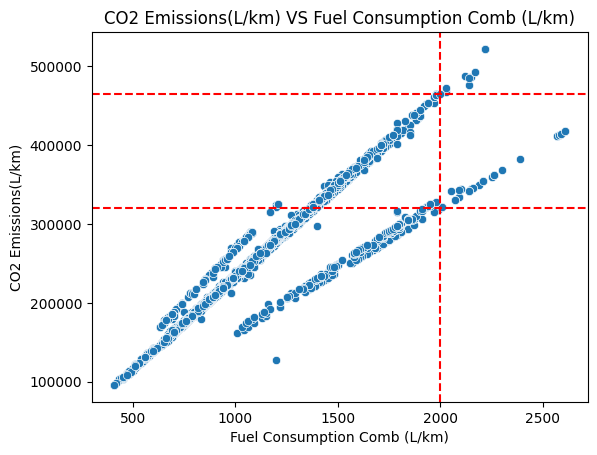

In [10]:
#plot the graph
ax = sns.scatterplot(
          x='Fuel Consumption Comb (L/km)',
          y='CO2 Emissions(L/km)',
          data=df_fuel_ce
            ).set_title("CO2 Emissions(L/km) VS Fuel Consumption Comb (L/km)")

## adding a line
plt.axvline(x=2000, ls='--', c='red')

# get CO2 Emissions(L/km) at Fuel Consumption Comb (L/km) = 2000
y_axis = list(df_fuel_ce[df_fuel_ce['Fuel Consumption Comb (L/km)'] ==2000]['CO2 Emissions(L/km)'])
plt.axhline(y=y_axis[0], ls='--', c='red')
plt.axhline(y=y_axis[1], ls='--', c='red')

The scatter plot suggests that fuel consumption and CO2 emission have a positive linear relationship. The tendency of the plot shows that the more fuel consumed, the more CO2 emission it made. 

However, for some data points at the x-axis, it shows multiple corresponding y-values. For example, at the point of 2000 in fuel consumption, it has two y-values, which are 320000 and 465000 respectively.

CO2 emission is generated by the consumption of fuel. The consumption of fuel depends on vehicles structures and
the type of fuel used.

Some vehicles consume more fuel while others consume less. This may be the reason why y has multiple values for some x points in the scatter plot. Let's explore vehicle structures based on their engine size.

In [11]:
#check engine size range
print("Engine size from ",
      cars['Engine Size(L)'].min(),
      "to" ,cars['Engine Size(L)'].max())

Engine size from  0.9 to 8.4


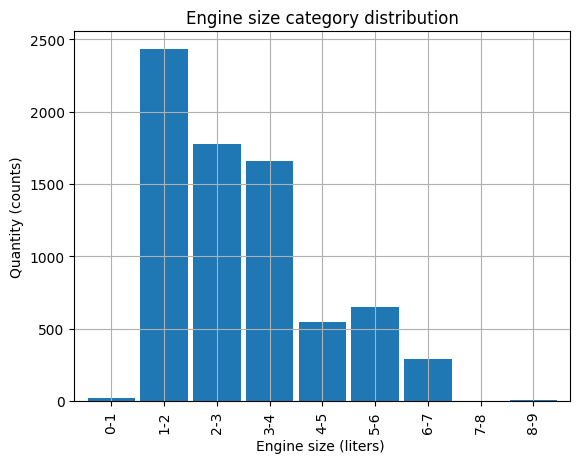

In [12]:
# classify data into different categories based on engine sizes
# 0-1, 1-2, 2-3, 3-4, 4-5, 5-6, 6-7, 7-8, 8-9
bins = np.arange(0,10)
labels = ['0-1','1-2', '2-3','3-4','4-5', '5-6', '6-7', '7-8','8-9']
cars['engine_group'] = pd.cut(cars['Engine Size(L)'], bins=bins, labels=labels)

#plot hist
cars['engine_group'].value_counts().sort_index().plot(kind='bar', width=0.9)
plt.title("Engine size category distribution")
plt.xlabel("Engine size (liters) ")
plt.ylabel("Quantity (counts)")
plt.grid()
plt.show()

From the distribution of engine size categories, the engine size categories can be classified into three groups as small, medium, and large based on their quantity.
-  Small: 0-1,7-8,8-9
-  Medium: 4-5, 5-6, 6-7
-  Large: 1-2,2-3,3-4

Let's see what is the CO2 emission in each group.

In [13]:
#create 3 mask for each group
mask_s = (cars['engine_group'] == '0-1') | (cars['engine_group'] == '7-8') | (cars['engine_group'] == '8-9')
mask_m = (cars['engine_group'] == '4-5') | (cars['engine_group'] == '5-6') | (cars['engine_group'] == '6-7')
mask_l = (cars['engine_group'] == '1-2') | (cars['engine_group'] == '2-3') | (cars['engine_group'] == '3-4')

#label data into small, medium, large
cars.loc[mask_s, 'popularity'] = "small"
cars.loc[mask_m, 'popularity'] = "medium"
cars.loc[mask_l, 'popularity'] = "large"

#check the labeled vehicles in the data
cars.popularity.value_counts(normalize=True)

large     0.794719
medium    0.201354
small     0.003927
Name: popularity, dtype: float64

In [14]:
def stat_summary(df, group_value, agg_value):
    """
    return a statistical summary on the given df, groupby value and agg_value for counting total
    """
    df_summary = df.groupby(group_value).agg(
                    avg_fuel_consumption_comb = ('Fuel Consumption Comb (L/100 km)', 'mean'),
                    avg_CO2_emission = ('CO2 Emissions(g/km)', 'mean'),
                    total_size = (agg_value, 'count')
                ).reset_index()
            
    return df_summary

In [15]:
# check the fuel consumption and emission for each group
df_stat = stat_summary(cars,'popularity','popularity')
df_stat

,popularity,avg_fuel_consumption_comb,avg_CO2_emission,total_size
0,large,10.009797,230.791447,5869
1,medium,14.799395,328.956288,1487
2,small,10.231034,237.758621,29


The "large" in popularity column, dominates around 80% of the entire dataset.

The total size of each popularity group confirms that Canadians prefer vehicles to have engine sizes 1-2, 2-3, and 3-4.

Additionally, vehicles in the "large" group make the least average C02 emissions due to the least average fuel consumed by comparing the other two popularity groups. The variation in the average calculation of fuel consumption and CO2 emission may cause by the difference in base total size in each group or  vehicle types.

To get to know the characteristics of the vehicle that makes less CO2 emission, we focus on the group, "large" in popularity.

In [16]:
# get the most popularity group
df_large = cars[mask_l].copy()

#keep engine_group with category 1-2, 2-3, 3-4
df_large['engine_size_cat'] = pd.Categorical(df_large['engine_group'], categories=['1-2','2-3','3-4'])

# get a stats in this group
df_large_stat = stat_summary(df_large, 'engine_size_cat', 'popularity')
df_large_stat

,engine_size_cat,avg_fuel_consumption_comb,avg_CO2_emission,total_size
0,1-2,8.524671,198.566612,2432
1,2-3,10.252984,239.430180,1776
2,3-4,11.924262,268.737508,1661


The pattern of average fuel consumption and average CO2 emission shows that smaller size engines consume less fuel and make less CO2. 

Would this pattern still be valid with a random same sample size for each group?

In [17]:
#get each group data based on popularity
group_1_2 = df_large[df_large['engine_size_cat'] =='1-2'][['Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']]

group_2_3 = df_large[df_large['engine_size_cat'] =='2-3'][['Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']]


group_3_4 = df_large[df_large['engine_size_cat'] =='3-4'][['Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']]

# create a function randomly pick 100 data points without replacements and repeat this process for 100 times
def sample_simulate(df):
    lst= []
    for i in range (100):
        lst.append(np.mean(df.sample(n=100)))
    df_new = pd.DataFrame(lst)
    return df_new

In [18]:
# get each group sampling mean
group_1_2_mean = sample_simulate(group_1_2)
group_2_3_mean = sample_simulate(group_2_3)
group_3_4_mean = sample_simulate(group_3_4)

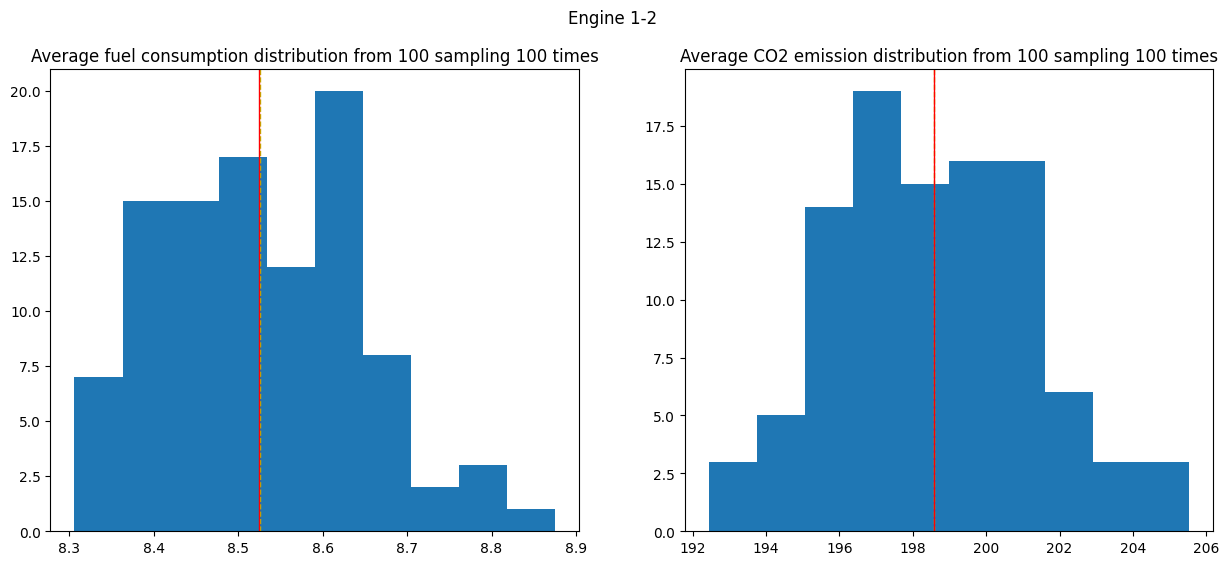

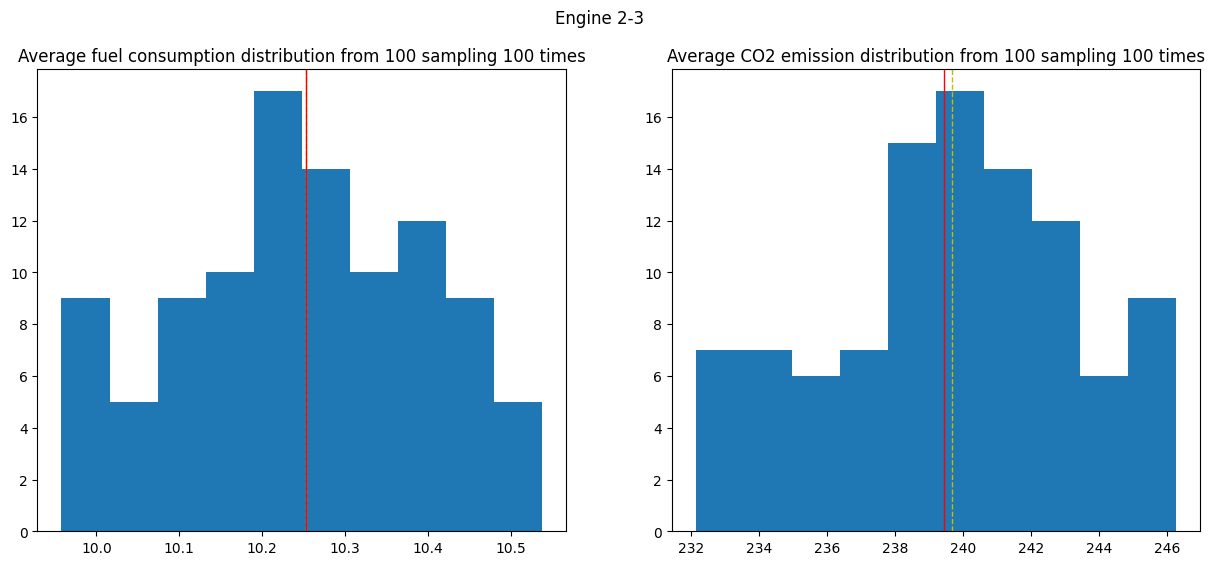

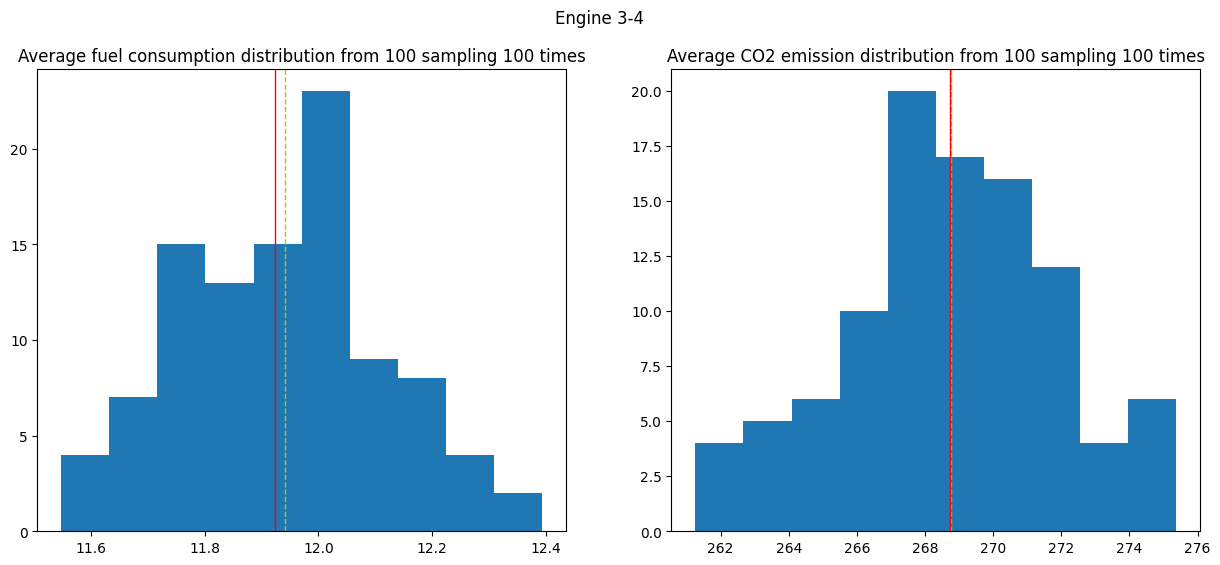

In [19]:
#create a function to plot graph

def plot_hist(df,title,df_data):
    '''
    This function will show a distribution plot of sampling mean
    Sample mean mark as yellow dash line
    Real population mean mark as red line
    '''
    fig,ax=plt.subplots(1,2, figsize=(15,6))
    
    #plot each sampling mean distribution 
    ax[0].hist(df['Fuel Consumption Comb (L/100 km)'])
    ax[0].set_title('Average fuel consumption distribution from 100 sampling 100 times')
    ax[0].axvline(df['Fuel Consumption Comb (L/100 km)'].mean(), color='y', linestyle='dashed', linewidth=1)
    ax[0].axvline(df_data[0], color='r', linewidth=1)
    
    ax[1].hist(df['CO2 Emissions(g/km)'])
    ax[1].set_title('Average CO2 emission distribution from 100 sampling 100 times')
    ax[1].axvline(df['CO2 Emissions(g/km)'].mean(), color='y', linestyle='dashed', linewidth=1)
    ax[1].axvline(df_data[1], color='r', linewidth=1)
    fig.suptitle(title)
    
    
plot_hist(group_1_2_mean,'Engine 1-2',df_large_stat.iloc[0, 1:3])
plot_hist(group_2_3_mean,'Engine 2-3',df_large_stat.iloc[1, 1:3])
plot_hist(group_3_4_mean,'Engine 3-4',df_large_stat.iloc[2, 1:3])

The smaller engine consumes less fuel and makes less CO2 emission is still right in the random sample with the same sample size. This can be proved by the scale of the x-axis.

As the repetition of computing sampling means increases, the overall sampling mean would get closer to the mean from the data. The distribution will be normally distributed.

Let's focus on the engine labeled as '1-2' and get further insights.

In [20]:
df_1_2_group= df_large[df_large['engine_size_cat'] =='1-2']
df_1_2_group['Fuel Type'].value_counts(normalize=True)

X    0.571546
Z    0.395148
D    0.024260
E    0.009046
Name: Fuel Type, dtype: float64

57% of vehicle with engine labeled 1-2 use "Regular gasoline", followed by 39.5% of vehicles in this group use "Premium gasoline". So, which one would make the most CO2 emission in this group?

In [21]:
df_1_2_f_sta = stat_summary(df_1_2_group,'Fuel Type','Fuel Type')

df_1_2_f_sta.sort_values(by='avg_CO2_emission', ascending=False)

,Fuel Type,avg_fuel_consumption_comb,avg_CO2_emission,total_size
3,Z,9.166077,213.498439,961
0,D,7.062712,189.813559,59
2,X,8.100719,188.902158,1390
1,E,11.213636,180.409091,22


Interestingly, 39.5% of vehicles use "Premium gasoline" makes the most average CO2 emission, whereas for 57% of vehicles that uses "Regular gasoline" only make 188.9 g/km average CO2 emission,  which is around 24.5 g/km less than "Premium gasoline".

Even though ethanol vehicles have the most average fuel consumption with the lowest average CO2 emission, it could mean that ethanol tends to be the clean energy source for vehicles, making less CO2 emission. However, the portion of ethanol vehicles is less than 1% in this group. It is hard to determine whether ethanol is a good source to reduce CO2 emissions or not.

Let's focus on vehicles with "Regular gasoline" fuel to discover how different types of vehicles make CO2 emissions.

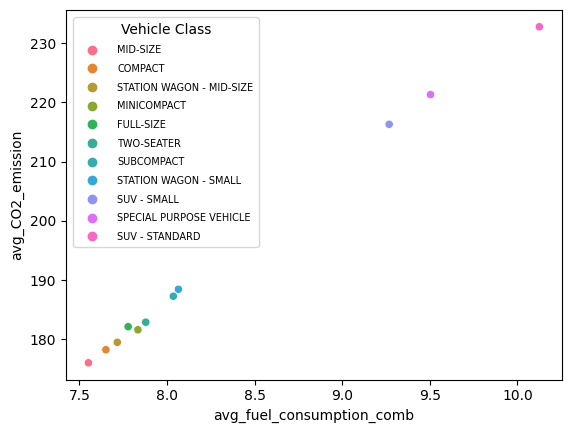

In [22]:
df_1_2_group_f = df_1_2_group[df_1_2_group['Fuel Type'] =='X']
df_1_2_stat= stat_summary(df_1_2_group_f,'Vehicle Class', 'Fuel Type').sort_values(by='avg_CO2_emission')

ax = sns.scatterplot(
            data = df_1_2_stat,
            x='avg_fuel_consumption_comb',
            y='avg_CO2_emission',
            hue = 'Vehicle Class'
)

plt.setp(ax.get_legend().get_texts(), fontsize='7') 
plt.show()

"MID-SIZE" ,  "COMPACT" and "STATION WAGON - MID-SIZE" are the top 3 that have low average fuel consumption to make low CO2 emissions from the first to the last one respectively.

Let's explore the common features in these 3 vehicle classes.

In [23]:
#extract the 3 vehicle classes
vehicle_class = ['MID-SIZE', 'COMPACT','STATION WAGON - MID-SIZE']

df_1_2_group_f_in = df_1_2_group_f[df_1_2_group_f['Vehicle Class'].isin(vehicle_class)]

df_1_2_group_f_in_sta = stat_summary(df_1_2_group_f_in,['Engine Size(L)','Transmission','Cylinders'],'Cylinders')

df_1_2_group_f_in_sta

,Engine Size(L),Transmission,Cylinders,avg_fuel_consumption_comb,avg_CO2_emission,total_size
0,1.2,AV,3,6.140000,142.700000,10
1,1.2,M5,3,6.490000,150.600000,10
2,1.4,A6,4,7.700000,178.333333,3
3,1.4,AM6,4,7.300000,169.000000,3
4,1.4,AS6,4,7.629032,177.935484,31
5,1.4,AS8,4,7.200000,167.500000,4
6,1.4,M5,4,7.200000,168.000000,2
7,1.4,M6,4,7.486667,173.700000,30
8,1.5,A4,4,7.400000,171.714286,7
9,1.5,A6,4,7.733333,180.666667,3


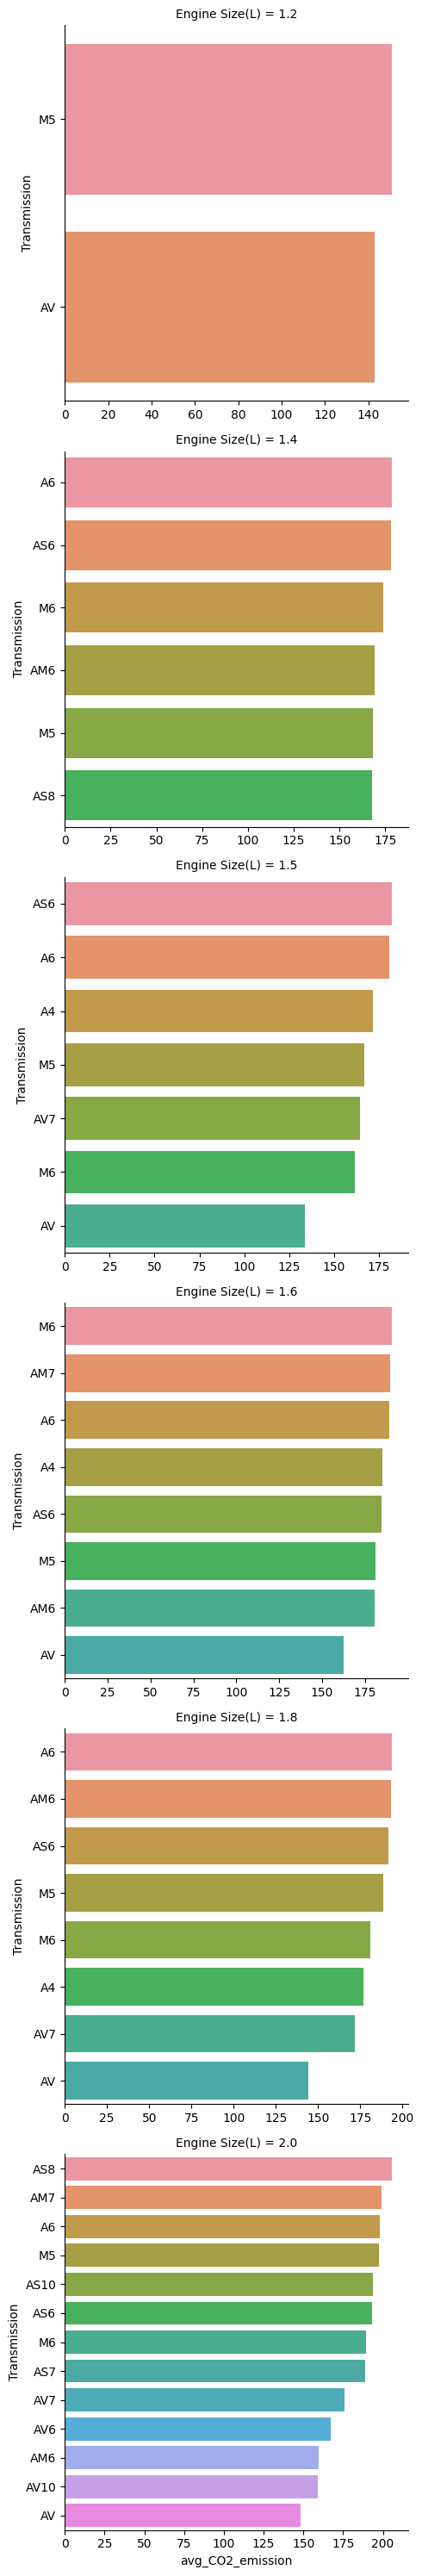

In [24]:
sns.catplot(
    data = df_1_2_group_f_in_sta.sort_values(by='avg_CO2_emission', ascending=False),
    y = 'Transmission',
    x = 'avg_CO2_emission',
    row = 'Engine Size(L)',
    kind='bar',
    sharey=False,
    sharex=False
)
plt.show()

For the transmission having the same prefix with a different gears, the average CO2 emission tends to become more as the gear value becomes larger. For example, transmission AM6 makes less average CO2 emission than AM7, other pairs like A6V and AV7 or AV and AV10. However, this is not always right. For transmission, M5 make more average CO2 emission than M6 or AS6 and AS7.

# Part II

## Objective
Helping a new team leader from different industry to learn about bicycle market and understand the brands and categories for sale in stores by analyzing company data through SQL.

## The data II

### Available tables:

#### products
- "product_id" - Product identifier.
- "product_name" - The name of the bicycle.
- "brand_id" - You can look up the brand's name in the "brands" table.
- "category_id" - You can look up the category's name in the "categories" table.
- "model_year" - The model year of the bicycle.
- "list_price" - The price of the bicycle.

#### brands
- "brand_id" - Matches the identifier in the "products" table.
- "brand_name" - One of the nine brands the store sells.

#### categories
- "category_id" - Matches the identifier in the "products" table.
- "category_name" - One of the seven product categories in the store.

### Findings
The company has 9 different brands of bikes in 7 categories with 321 products.

The least quantity of bike category is Cyclocross Bicycles, which has 10. The most of bike quantity is Cruisers Bicycles, which has 78.

Surprisingly, the top one on the average list price in the bike category is Electric Bikes with \$3281.66, followed by Road Bikes and Cyclocross Bicycles. Cruisers Bicycles only ranked fifth position in average list price with \$730.41. Even though the quantity of Electric Bike is around one-third of Cruisers Bicycle, the average list price of Electric Bike is more than four times Cruisers Bicycle's listing price. If all Electric Bikes(23 bikes) have been sold, this is equivalent to selling at least 92 Cruisers Bicycles for the same total list price.

Trek and Sun Bicycles are the top brands that cover 5 categories of bikes, followed by Electra. However, Trek and Electra have significantly higher quantities than Sun Bicycles. There are 135, 118, and 23 for Trek, Electra, and Sun Bicycles respectively. Additionally, the average list price on each category for these three brands also followed the same order as the brand quantity ranked. 

### Conclusion and Reconmendation
The store has a strong preference for Trek and Electra due to their quantities, variety of categories, and average list price for each category. It would be profitable to promote sales of these two brands since they allow consumers to choose different varieties of bikes.

1. What is the most expensive item your company sells? 

   The most expensive item that company sells is Trek Domane SLR 9 Disc - 2018

In [25]:
SELECT 
	product_name,
	list_price
FROM products
WHERE list_price =(
	SELECT 
	TOP 1
	MAX(list_price) OVER(ORDER BY list_price desc)
	FROM products);

,product_name,list_price
0,Trek Domane SLR 9 Disc - 2018,11999.99


What is the least expensiveitem your company sells?

The least expensive item that company sells is Trek Domane Strider Classic 12 Balance Bike - 2018

In [26]:
SELECT 
	product_name,
	list_price
FROM products
WHERE list_price =(
	SELECT 
	TOP 1
	MIN(list_price) OVER(ORDER BY list_price)
	FROM products);

,product_name,list_price
0,Strider Classic 12 Balance Bike - 2018,89.99


2. How many different products of each category does your company sell?

    There are seven different product categories. The value of products in each category can be viewed the following querry.

In [27]:
SELECT
	 c.category_name,
	 COUNT(*) AS total_products
FROM products AS p
LEFT JOIN categories AS c
ON p.category_id = c.category_id
GROUP BY c.category_name
ORDER BY total_products;

,category_name,total_products
0,Cyclocross Bicycles,10
1,Electric Bikes,24
2,Comfort Bicycles,30
3,Children Bicycles,59
4,Mountain Bikes,60
5,Road Bikes,60
6,Cruisers Bicycles,78


3. What are the top three brands with the highest average list price?

    The top 3 brands with the highest average list price are Trek, Heller and Surly.

In [28]:
SELECT 
	brand_name,
	AVG(list_price) AS avg_list_price
FROM products AS p
LEFT JOIN brands AS b
ON p.brand_id = b.brand_id
GROUP BY brand_name
ORDER BY AVG(list_price) DESC;

,brand_name,avg_list_price
0,Trek,2500.064074
1,Heller,2172.996666
2,Surly,1331.753600
3,Electra,761.006186
4,Ritchey,749.990000
5,Haro,621.990000
6,Sun Bicycles,524.468260
7,Pure Cycles,442.333333
8,Strider,209.990000


   What are the top three categories with the highest average list price? 
   
   The top three categories with the highest average list price are Electric Bikes, Road Bikes and Cyclocross Bicycles.

In [29]:
SELECT 
	category_name,
	ROUND(AVG(list_price),2) AS avg_list_price
FROM products AS p
LEFT JOIN categories AS c
ON p.category_id = c.category_id
GROUP BY category_name
ORDER BY AVG(list_price) DESC;

,category_name,avg_list_price
0,Electric Bikes,3281.66
1,Road Bikes,3175.36
2,Cyclocross Bicycles,2542.79
3,Mountain Bikes,1649.76
4,Cruisers Bicycles,730.41
5,Comfort Bicycles,682.12
6,Children Bicycles,287.79


The brand with most products in categories

In [30]:
WITH all_info AS(
	SELECT 
		product_name,
		model_year,
		list_price,
		brand_name,
		category_name
	FROM products AS p
	LEFT JOIN brands AS b
	ON p.brand_id = b.brand_id
	LEFT JOIN categories AS c
	ON p.category_id = c.category_id
)

SELECT
	brand_name,
	COUNT(*) AS number_of_categories,
	SUM(quantity) AS total_quantity,
	ROUND(AVG(total_list_price),2) AS avg_list_price
FROM(
SELECT 
	brand_name,
	category_name,
	COUNT(*) AS quantity,
	SUM(list_price) AS total_list_price
FROM all_info
GROUP BY category_name, brand_name) sub
GROUP BY brand_name
ORDER BY number_of_categories DESC, total_quantity DESC;

,brand_name,number_of_categories,total_quantity,avg_list_price
0,Trek,5,135,67501.73
1,Sun Bicycles,5,23,2412.55
2,Electra,4,118,22449.68
3,Surly,3,25,11097.95
4,Haro,2,10,3109.95
5,Heller,1,3,6518.99
6,Pure Cycles,1,3,1327.00
7,Strider,1,3,629.97
8,Ritchey,1,1,749.99


In [31]:
SELECT 
	COUNT(*) AS total_products
FROM products;

,total_products
0,321
